In [80]:
%load_ext autoreload
%autoreload 2
import numpy as np
from juno import utils
from pprint import pprint
from juno.juno_custom.elements.Herschel.structures import HerschelSettings, HerschelSimSettings

from LightPipes import *

from juno.juno_custom.tools import sim_tools
import juno.juno_custom.elements.Herschel.utils as h_utils
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
config = utils.load_yaml_config(config_filename=r'C:\Users\User\Github\juno\juno\juno_custom\configthesis.yaml')
settings = HerschelSettings.from_dict(config.get('HerschelSettings'))
sim_settings = HerschelSimSettings.from_dict(config.get('HerschelSimSettings'))
wavelength = sim_settings.wavelength
pixel_size= wavelength * 0.5
# media_wavelength = wavelength / 2
# pixel_size = media_wavelength * 0.5

In [82]:
settings.calculate_radii(pixel_size=pixel_size)
raw_profiles = h_utils.create_raw_profiles(settings)
profiles = h_utils.calculate_profiles(settings, raw_profiles, pixel_size)
lenses = h_utils.generate_lenses(settings, profiles)
padded_lenses = h_utils.calculate_padding(profiles=profiles, lenses=lenses, settings=settings, sim_settings=sim_settings, pixel_size=pixel_size)

In [83]:
sim_lens, sim_lens_padding = sim_tools.generate_sim_lens(settings, sim_settings, pixel_size)
# sim_lens.profile = sim_lens.profile.max() - sim_lens.profile
sim_wavefront = sim_tools.generate_sim_wavefront(sim_lens=sim_lens, sim_lens_padding=sim_lens_padding, settings=settings, sim_settings=sim_settings)

In [84]:
start = -settings.z_medium_o * 0.95
stop = -settings.z_medium_o * 1.05
start = -settings.z_medium_o * 0
stop = -settings.z_medium_o * 2
start = -settings.z_medium_o * -1#-1.1
start = 0
stop = sim_settings.initial_lens_focal_length *2#-1.1
# stop = -settings.z_medium_o * 0
# start = -settings.z_medium_o * 0#-1.1
# stop = -settings.z_medium_o * 2

print(start)

step = (stop-start)/(200-1)
distances = np.arange(start, stop, step)
distances = np.append(distances, stop)
output, propagation, output_array = sim_tools.propagate_zero_lens(wavefront=sim_wavefront, 
                                                settings=settings,
                                                sim_settings=sim_settings, 
                                                distances=distances,
                                                pixel_size=pixel_size)

0


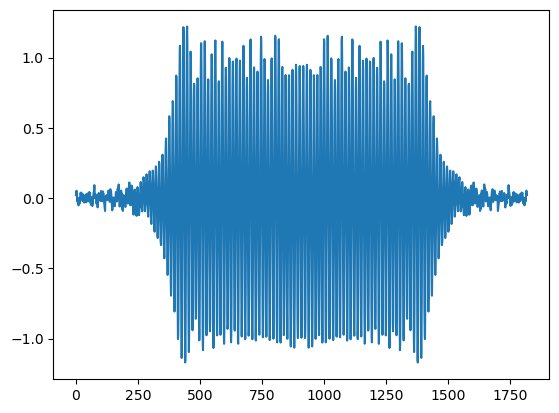

In [85]:
plt.plot(propagation[0])

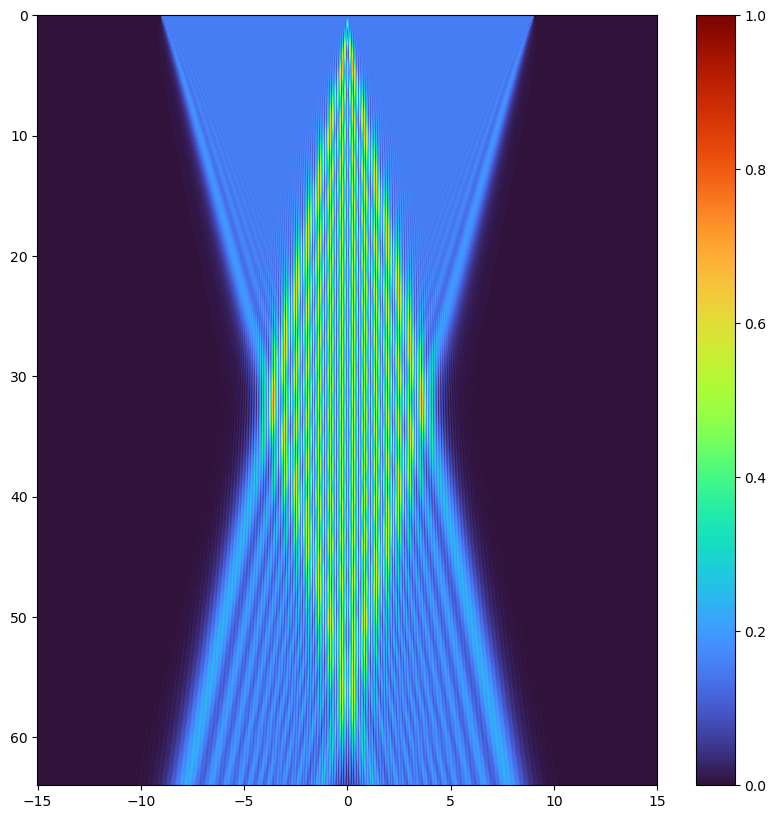

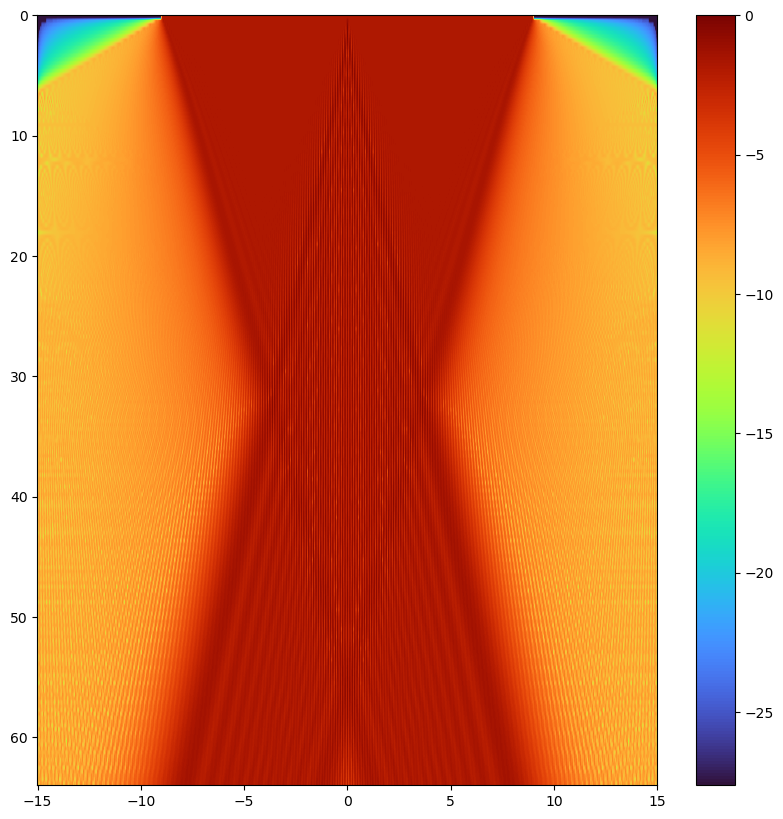

In [86]:
extent = [-output_array.shape[1]*pixel_size/2, output_array.shape[1]*pixel_size/2, distances[-1], distances[0]]

# normalise output_array
output_array = output_array / np.max(output_array)
plt.figure(figsize=(10,10))
plt.imshow(output_array, aspect='auto', extent=extent, cmap='turbo')
plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(np.log(output_array+1e-12), aspect='auto', extent=extent, cmap='turbo')
plt.colorbar()
plt.show()